# <u> Project 2 Auto Trader Data (Ford)
## Team Proud Pythoneers


First we must import all 4 databases for the 4 different car models.
The car models chosen were Focus, Fiesta, Ka and Puma

In [143]:
## Before bringing in the datasets we need the packages
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os
from collinearity import SelectNonCollinear
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.tools
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [144]:
file_directory = r'FilesProject2/'

In [145]:
file_path = os.path.join(file_directory , "*.txt")

In [146]:
all_files = glob.glob(file_path)

In [147]:
# Check that this lists your files
all_files

['FilesProject2\\Ford_Fiesta.txt',
 'FilesProject2\\Ford_Focus.txt',
 'FilesProject2\\Ford_Ka.txt',
 'FilesProject2\\Ford_Puma.txt']

In [148]:
dataframes = []

for filename in all_files:
    df = pd.read_csv(filename)
    df['FilesProject2'] = filename
    dataframes.append(df)

cars = pd.concat(dataframes, axis=0, ignore_index=True)

In [149]:
cars['car model'] = cars['FilesProject2'].str.replace('FilesProject2\\', '', regex=False).str.replace('.txt', '',regex=False)

In [150]:
cars.head(10)

,name,link,price,mileage,BHP,transmission,fuel,owners,body,ULEZ,engine,year,FilesProject2,car model
0,Ford Fiesta,https://www.autotrader.co.uk/car-details/20220...,"£1,290",83000.0,79.0,Manual,Petrol,5.0,Hatchback,ULEZ,1.4L,2005 (05 reg),FilesProject2\Ford_Fiesta.txt,Ford_Fiesta
1,Ford Fiesta,https://www.autotrader.co.uk/car-details/20220...,"£1,699",71724.0,79.0,Manual,Petrol,NaN,Hatchback,ULEZ,1.4L,2005 (55 reg),FilesProject2\Ford_Fiesta.txt,Ford_Fiesta
2,Ford Fiesta,https://www.autotrader.co.uk/car-details/20220...,"£1,380",92200.0,79.0,Manual,Petrol,7.0,Hatchback,ULEZ,1.4L,2005 (05 reg),FilesProject2\Ford_Fiesta.txt,Ford_Fiesta
3,Ford Fiesta,https://www.autotrader.co.uk/car-details/20220...,"£1,999",113459.0,99.0,Manual,Petrol,4.0,Hatchback,ULEZ,1.6L,2005 (55 reg),FilesProject2\Ford_Fiesta.txt,Ford_Fiesta
4,Ford Fiesta,https://www.autotrader.co.uk/car-details/20220...,£995,89960.0,74.0,Manual,Petrol,2.0,Hatchback,ULEZ,NaN,2005 (54 reg),FilesProject2\Ford_Fiesta.txt,Ford_Fiesta
5,Ford Fiesta,https://www.autotrader.co.uk/car-details/20220...,"£1,295",106000.0,74.0,Manual,Petrol,NaN,Hatchback,ULEZ,NaN,2005 (55 reg),FilesProject2\Ford_Fiesta.txt,Ford_Fiesta
6,Ford Fiesta,https://www.autotrader.co.uk/car-details/20220...,"£1,595",79000.0,74.0,Manual,Petrol,NaN,Hatchback,ULEZ,NaN,2005 (54 reg),FilesProject2\Ford_Fiesta.txt,Ford_Fiesta
7,Ford Fiesta,https://www.autotrader.co.uk/car-details/20220...,"£1,000",114000.0,79.0,Manual,Petrol,5.0,Hatchback,ULEZ,1.4L,2005 (05 reg),FilesProject2\Ford_Fiesta.txt,Ford_Fiesta
8,Ford Fiesta,https://www.autotrader.co.uk/car-details/20220...,"£1,490",113620.0,99.0,Manual,Petrol,NaN,Hatchback,ULEZ,1.6L,2005 (55 reg),FilesProject2\Ford_Fiesta.txt,Ford_Fiesta
9,Ford Fiesta,https://www.autotrader.co.uk/car-details/20220...,"£2,195",96000.0,79.0,Manual,Petrol,3.0,Hatchback,ULEZ,1.4L,2005 (55 reg),FilesProject2\Ford_Fiesta.txt,Ford_Fiesta


In [151]:
cars.tail(10)

,name,link,price,mileage,BHP,transmission,fuel,owners,body,ULEZ,engine,year,FilesProject2,car model
21337,Ford Puma,https://www.autotrader.co.uk/car-details/20220...,"£31,000",7807.0,NaN,Manual,Petrol,NaN,SUV,ULEZ,1.5L,2021 (21 reg),FilesProject2\Ford_Puma.txt,Ford_Puma
21338,Ford Puma,https://www.autotrader.co.uk/car-details/20220...,"£24,500",2536.0,NaN,Automatic,Petrol,NaN,SUV,ULEZ,1.0L,2021 (21 reg),FilesProject2\Ford_Puma.txt,Ford_Puma
21339,Ford Puma,https://www.autotrader.co.uk/car-details/20220...,"£30,000",5285.0,NaN,Manual,Petrol,NaN,SUV,ULEZ,1.5L,2021 (21 reg),FilesProject2\Ford_Puma.txt,Ford_Puma
21340,Ford Puma,https://www.autotrader.co.uk/car-details/20220...,"£21,950",5780.0,NaN,Manual,Petrol,NaN,SUV,ULEZ,1.0L,NaN,FilesProject2\Ford_Puma.txt,Ford_Puma
21341,Ford Puma,https://www.autotrader.co.uk/car-details/20220...,"£29,000",12096.0,NaN,Manual,Petrol,NaN,SUV,ULEZ,1.5L,2021 (70 reg),FilesProject2\Ford_Puma.txt,Ford_Puma
21342,Ford Puma,https://www.autotrader.co.uk/car-details/20220...,"£23,290",7599.0,NaN,Manual,Petrol,NaN,SUV,ULEZ,1.0L,2021 (21 reg),FilesProject2\Ford_Puma.txt,Ford_Puma
21343,Ford Puma,https://www.autotrader.co.uk/car-details/20220...,"£27,999",5600.0,NaN,Manual,Petrol,NaN,SUV,ULEZ,1.5L,2021 (70 reg),FilesProject2\Ford_Puma.txt,Ford_Puma
21344,Ford Puma,https://www.autotrader.co.uk/car-details/20220...,"£21,750",9000.0,NaN,Manual,Petrol,2.0,SUV,ULEZ,1.0L,2021 (70 reg),FilesProject2\Ford_Puma.txt,Ford_Puma
21345,Ford Puma,https://www.autotrader.co.uk/car-details/20220...,"£28,990",300.0,NaN,Automatic,Petrol,NaN,SUV,ULEZ,1.0L,2021 (71 reg),FilesProject2\Ford_Puma.txt,Ford_Puma
21346,Ford Puma,https://www.autotrader.co.uk/car-details/20211...,"£26,995",622.0,NaN,Manual,Petrol,NaN,SUV,ULEZ,1.0L,2021 (71 reg),FilesProject2\Ford_Puma.txt,Ford_Puma


In [152]:
# Here we renamed the car model column to car_model
cars.rename(columns={'car model': 'car_model'}, inplace = True)
cars.columns

Index(['name', 'link', 'price', 'mileage', 'BHP', 'transmission', 'fuel',
       'owners', 'body', 'ULEZ', 'engine', 'year', 'FilesProject2',
       'car_model'],
      dtype='object')

In [153]:
## Now we can see the data lets have a look at some information about it
len(cars)

21347

In [154]:
# Data types
cars.dtypes

name              object
link              object
price             object
mileage          float64
BHP              float64
transmission      object
fuel              object
owners           float64
body              object
ULEZ              object
engine            object
year              object
FilesProject2     object
car_model         object
dtype: object

In [155]:
# Shape
cars.shape

(21347, 14)

In [156]:
cars.name.unique()

array(['Ford Fiesta', 'Ford Fiesta Zetec S',
       'Ford Fiesta 1.4 Titanium 5-Door Hatchback',
       'Ford Fiesta Hatchback', 'Ford Fiesta Diesel Hatchback',
       'Ford Fiesta 1.6 Zetec Powershift 5-Door Hatchback',
       'Ford Fiesta Hatchback 5-Door', 'Ford Fiesta Titanium',
       'Ford Fiesta Hatchback Special Editions',
       'Ford Fiesta Hatchback Special', 'Ford Polo',
       'Ford Fiesta Vignale', 'Ford New Fiesta',
       'Ford Fiesta 1.0T ( 140ps ) ( s/s ) ST-Line Red Edition',
       'Ford Fiesta-Vignale', 'Ford Fiesta Vignale Hatchback',
       'Ford Fiesta Vignale Edition Tu', 'Ford Fiesta St',
       'Ford Fiesta 1.0T EcoBoost MHEV ST-Line X Edition 5dr Pe',
       'Ford Focus', 'Ford Focus Zetec', 'Ford XF',
       'Ford Focus Diesel Hatchback', 'Ford Focus Hatchback',
       'Ford Focus Estate', 'Ford Focus Diesel Estate', 'Ford Focus St',
       'Ford Focus 2.0 TDCi ST-2 Hatchback 5dr Diesel',
       'Ford Focus 1.0T EcoBoost Titanium Hatchback 5dr Petrol',
    

In [157]:
## The missing data from ULEZ is because them cars had are not ULEZ so we can assign NOT ULEZ to them
cars['ULEZ'] = cars['ULEZ'].fillna('Not_ULEZ')


In [158]:
## Here we change the fuel column into a category
cars['fuel'] = cars.fuel.astype('category')

## If we check its unique values again, we can see that its type has been updated

cars['fuel'].unique()

['Petrol', 'Diesel', 'Petrol Hybrid', NaN]
Categories (3, object): ['Diesel', 'Petrol', 'Petrol Hybrid']

In [159]:
## Here we change the body column into a category
cars['body'] = cars.body.astype('category')

## If we check its unique values again, we can see that its type has been updated

cars['body'].unique()

['Hatchback', 'Estate', 'Saloon', NaN, 'SUV']
Categories (4, object): ['Estate', 'Hatchback', 'SUV', 'Saloon']

In [160]:
## Here we change the transmission column into a category
cars['transmission'] = cars.transmission.astype('category')

## If we check its unique values again, we can see that its type has been updated

cars['transmission'].unique()

['Manual', 'Automatic', NaN]
Categories (2, object): ['Automatic', 'Manual']

In [161]:
## Here we change the car model column into a category
cars['car_model'] = cars.car_model.astype('category')

## If we check its unique values again, we can see that its type has been updated

cars['car_model'].unique()

['Ford_Fiesta', 'Ford_Focus', 'Ford_Ka', 'Ford_Puma']
Categories (4, object): ['Ford_Fiesta', 'Ford_Focus', 'Ford_Ka', 'Ford_Puma']

In [162]:
## Now we can check the new data types
cars.dtypes

name               object
link               object
price              object
mileage           float64
BHP               float64
transmission     category
fuel             category
owners            float64
body             category
ULEZ               object
engine             object
year               object
FilesProject2      object
car_model        category
dtype: object

In [163]:
## Splitting year and reg
cars[['year','reg']] = cars['year'].str.split(' ',1, expand=True)
cars.head()


,name,link,price,mileage,BHP,transmission,fuel,owners,body,ULEZ,engine,year,FilesProject2,car_model,reg
0,Ford Fiesta,https://www.autotrader.co.uk/car-details/20220...,"£1,290",83000.0,79.0,Manual,Petrol,5.0,Hatchback,ULEZ,1.4L,2005,FilesProject2\Ford_Fiesta.txt,Ford_Fiesta,(05 reg)
1,Ford Fiesta,https://www.autotrader.co.uk/car-details/20220...,"£1,699",71724.0,79.0,Manual,Petrol,NaN,Hatchback,ULEZ,1.4L,2005,FilesProject2\Ford_Fiesta.txt,Ford_Fiesta,(55 reg)
2,Ford Fiesta,https://www.autotrader.co.uk/car-details/20220...,"£1,380",92200.0,79.0,Manual,Petrol,7.0,Hatchback,ULEZ,1.4L,2005,FilesProject2\Ford_Fiesta.txt,Ford_Fiesta,(05 reg)
3,Ford Fiesta,https://www.autotrader.co.uk/car-details/20220...,"£1,999",113459.0,99.0,Manual,Petrol,4.0,Hatchback,ULEZ,1.6L,2005,FilesProject2\Ford_Fiesta.txt,Ford_Fiesta,(55 reg)
4,Ford Fiesta,https://www.autotrader.co.uk/car-details/20220...,£995,89960.0,74.0,Manual,Petrol,2.0,Hatchback,ULEZ,NaN,2005,FilesProject2\Ford_Fiesta.txt,Ford_Fiesta,(54 reg)


In [164]:
## There are four columns that provide no use these are the name, link, REG and fileproject2
## so we will drop these columns
## We drop the name column as this would be too specific and could not be applied to other data
cars.drop(columns=['link'], inplace = True)
cars.drop(columns=['FilesProject2'], inplace = True)
cars.drop(columns=['name'], inplace = True)
cars.drop(columns=['reg'], inplace = True)

In [165]:
cars.head(10)

,price,mileage,BHP,transmission,fuel,owners,body,ULEZ,engine,year,car_model
0,"£1,290",83000.0,79.0,Manual,Petrol,5.0,Hatchback,ULEZ,1.4L,2005,Ford_Fiesta
1,"£1,699",71724.0,79.0,Manual,Petrol,NaN,Hatchback,ULEZ,1.4L,2005,Ford_Fiesta
2,"£1,380",92200.0,79.0,Manual,Petrol,7.0,Hatchback,ULEZ,1.4L,2005,Ford_Fiesta
3,"£1,999",113459.0,99.0,Manual,Petrol,4.0,Hatchback,ULEZ,1.6L,2005,Ford_Fiesta
4,£995,89960.0,74.0,Manual,Petrol,2.0,Hatchback,ULEZ,NaN,2005,Ford_Fiesta
5,"£1,295",106000.0,74.0,Manual,Petrol,NaN,Hatchback,ULEZ,NaN,2005,Ford_Fiesta
6,"£1,595",79000.0,74.0,Manual,Petrol,NaN,Hatchback,ULEZ,NaN,2005,Ford_Fiesta
7,"£1,000",114000.0,79.0,Manual,Petrol,5.0,Hatchback,ULEZ,1.4L,2005,Ford_Fiesta
8,"£1,490",113620.0,99.0,Manual,Petrol,NaN,Hatchback,ULEZ,1.6L,2005,Ford_Fiesta
9,"£2,195",96000.0,79.0,Manual,Petrol,3.0,Hatchback,ULEZ,1.4L,2005,Ford_Fiesta


In [166]:
## Here we remove the L from the engine column and change to a float
cars['engine'] = cars['engine'].str.replace('L','')
cars['engine'] = cars['engine'].astype('float')

In [167]:
cars['price'] = cars['price'].str.replace('£','')
cars['price'] = cars['price'].str.replace(',','')
cars['price'] = cars['price'].astype('float')

In [168]:
## Looking at the mean price of a car
cars['price'].mean()

10815.804703236989

In [169]:
cars.dtypes

price            float64
mileage          float64
BHP              float64
transmission    category
fuel            category
owners           float64
body            category
ULEZ              object
engine           float64
year              object
car_model       category
dtype: object

In [170]:
cars.head()

,price,mileage,BHP,transmission,fuel,owners,body,ULEZ,engine,year,car_model
0,1290.0,83000.0,79.0,Manual,Petrol,5.0,Hatchback,ULEZ,1.4,2005,Ford_Fiesta
1,1699.0,71724.0,79.0,Manual,Petrol,NaN,Hatchback,ULEZ,1.4,2005,Ford_Fiesta
2,1380.0,92200.0,79.0,Manual,Petrol,7.0,Hatchback,ULEZ,1.4,2005,Ford_Fiesta
3,1999.0,113459.0,99.0,Manual,Petrol,4.0,Hatchback,ULEZ,1.6,2005,Ford_Fiesta
4,995.0,89960.0,74.0,Manual,Petrol,2.0,Hatchback,ULEZ,NaN,2005,Ford_Fiesta


In [171]:
## Here we change the year column into a category
#cars['year'] = cars.year.astype('category')

## If we check its unique values again, we can see that its type has been updated

#cars['year'].unique()

In [172]:
## Here we change the ULEZ column into a category
cars['ULEZ'] = cars.ULEZ.astype('category')

## If we check its unique values again, we can see that its type has been updated

cars['ULEZ'].unique()

['ULEZ', 'Not_ULEZ']
Categories (2, object): ['Not_ULEZ', 'ULEZ']

In [173]:
## Checking for nulls in the columns
cars.isnull().sum()

price               0
mileage             7
BHP              9862
transmission        8
fuel                4
owners          13570
body                3
ULEZ                0
engine           2061
year              220
car_model           0
dtype: int64

In [174]:
## Now we drop the null rows that do not contain many values
cars.dropna(subset=['year'],inplace=True)
cars.dropna(subset=['body'],inplace=True)
cars.dropna(subset=['fuel'],inplace=True)
cars.dropna(subset=['transmission'],inplace=True)
cars.dropna(subset=['mileage'],inplace=True)

In [175]:
## The missing data from owners is because them cars had no owners, so we can assign 0 to them
## we then filter this out the data are we are modeling used cars
cars['owners'] = cars['owners'].fillna(0)
cars = cars.loc[cars['owners'] != 0]


In [176]:
cars.head()

,price,mileage,BHP,transmission,fuel,owners,body,ULEZ,engine,year,car_model
0,1290.0,83000.0,79.0,Manual,Petrol,5.0,Hatchback,ULEZ,1.4,2005,Ford_Fiesta
2,1380.0,92200.0,79.0,Manual,Petrol,7.0,Hatchback,ULEZ,1.4,2005,Ford_Fiesta
3,1999.0,113459.0,99.0,Manual,Petrol,4.0,Hatchback,ULEZ,1.6,2005,Ford_Fiesta
4,995.0,89960.0,74.0,Manual,Petrol,2.0,Hatchback,ULEZ,NaN,2005,Ford_Fiesta
7,1000.0,114000.0,79.0,Manual,Petrol,5.0,Hatchback,ULEZ,1.4,2005,Ford_Fiesta


In [177]:
## Checking the other nulls that we will fill in with training data
cars.isnull().sum()


price              0
mileage            0
BHP             2031
transmission       0
fuel               0
owners             0
body               0
ULEZ               0
engine           999
year               0
car_model          0
dtype: int64

## <u> Some Basic Analysis

In [178]:
## Gathering the descriptive statistics
cars.describe()

,price,mileage,BHP,owners,engine
count,7707.000000,7707.000000,5676.000000,7707.000000,6708.000000
mean,7903.889840,59561.560140,106.869979,2.769301,1.387776
std,5140.880308,31569.622571,38.189945,1.127242,0.354842
min,450.000000,36.000000,59.000000,2.000000,1.000000
25%,4300.000000,35000.000000,81.000000,2.000000,1.000000
50%,6986.000000,56000.000000,99.000000,2.000000,1.400000
75%,9999.000000,81063.000000,123.000000,3.000000,1.600000
max,79995.000000,221060.000000,345.000000,16.000000,2.500000


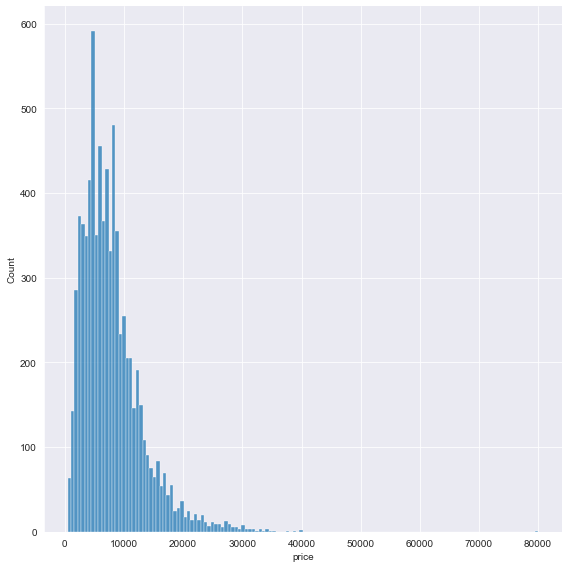

In [179]:
sns.displot(cars['price'],
            height = 8)
plt.show()

In [180]:
## Now for correlations
cars.corr()

,price,mileage,BHP,owners,engine
price,1.000000,-0.660652,0.525224,-0.289288,-0.006849
mileage,-0.660652,1.000000,0.000588,0.341486,0.325248
BHP,0.525224,0.000588,1.000000,0.125736,0.546330
owners,-0.289288,0.341486,0.125736,1.000000,0.268886
engine,-0.006849,0.325248,0.546330,0.268886,1.000000


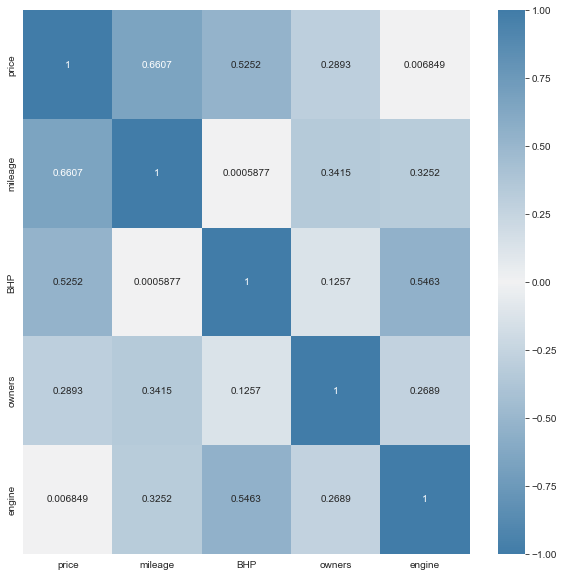

In [181]:
## Producing a correlation matrix
plt.figure(figsize = (10, 10))
sns.heatmap(cars.corr().abs(),
            annot = True,
            linecolor='black',
            center=0,
            vmin=-1,
            vmax=1,
            cmap = sns.diverging_palette(600,600, as_cmap=True),
            fmt='.4g'
            )
plt.show()

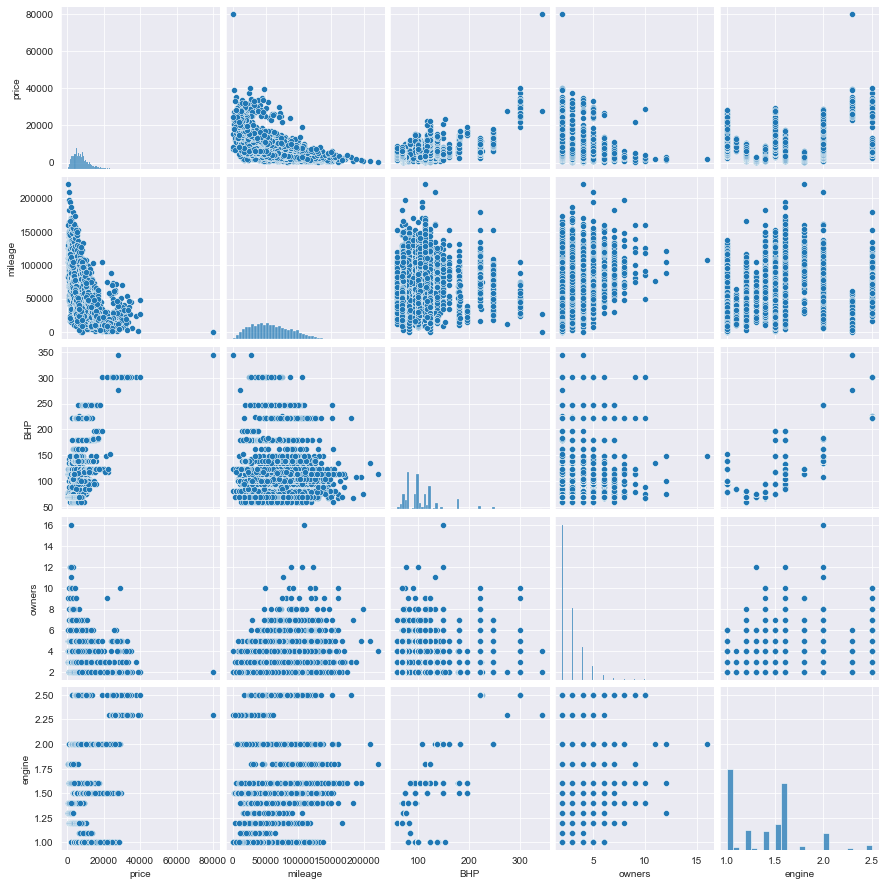

In [182]:
# And a pair plot

sns.pairplot(cars)
plt.show()

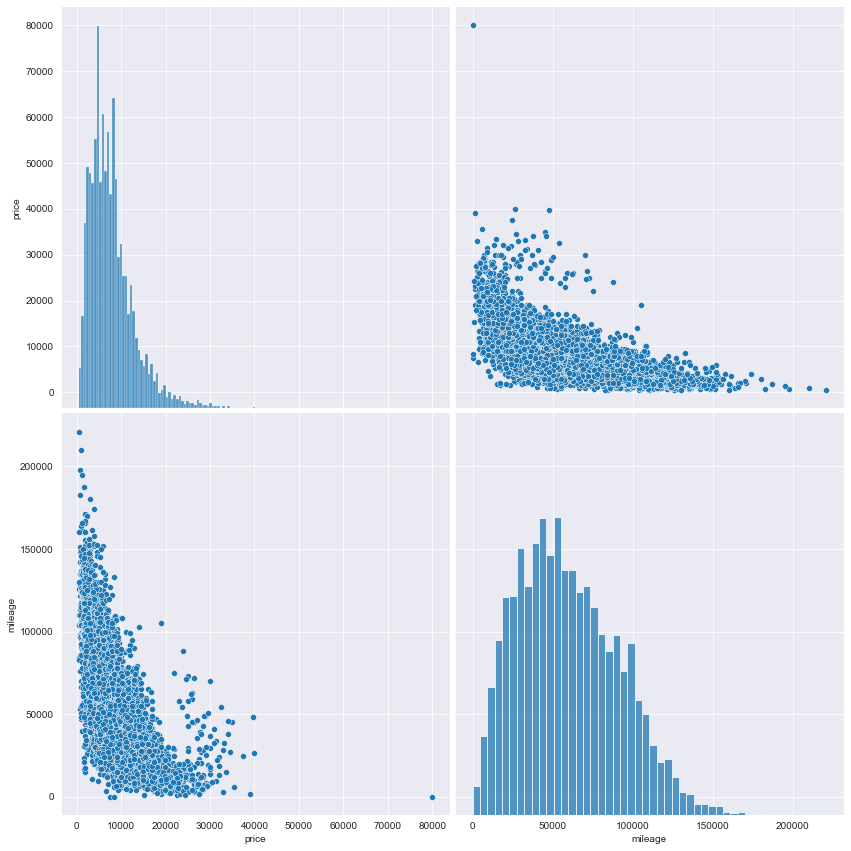

In [183]:
## A pair plot for price and mileage
sns.pairplot(cars[['price', 'mileage']], height = 6)
plt.show()

This pair plot of price and mileage look to follow the pattern of the lower the mileage then the greater the price.

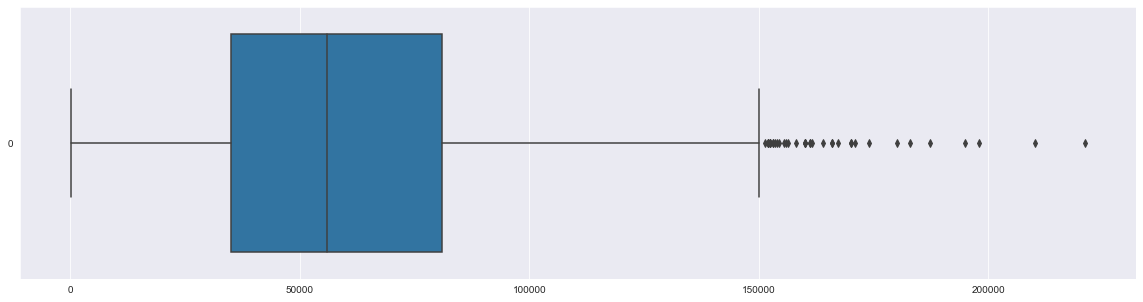

In [184]:
## Now we make a box plot of the price to find any outliers
plt.figure(figsize = (20, 5))
sns.boxplot(data = cars['mileage'],
            orient = 'h')
plt.show()

# <u> Time to split the data

In [185]:
## First make feature columns without the target
feature_cols = list(cars.columns)
feature_cols.remove('price')

In [186]:
# Now create x and y
X = cars[feature_cols]
y = cars['price']
X.head()

,mileage,BHP,transmission,fuel,owners,body,ULEZ,engine,year,car_model
0,83000.0,79.0,Manual,Petrol,5.0,Hatchback,ULEZ,1.4,2005,Ford_Fiesta
2,92200.0,79.0,Manual,Petrol,7.0,Hatchback,ULEZ,1.4,2005,Ford_Fiesta
3,113459.0,99.0,Manual,Petrol,4.0,Hatchback,ULEZ,1.6,2005,Ford_Fiesta
4,89960.0,74.0,Manual,Petrol,2.0,Hatchback,ULEZ,NaN,2005,Ford_Fiesta
7,114000.0,79.0,Manual,Petrol,5.0,Hatchback,ULEZ,1.4,2005,Ford_Fiesta


In [187]:
## Now we can split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [188]:
## Now use mean of training data to fill in the nulls of both the training and test data
column_means = X_train.mean()
X_train = X_train.fillna(column_means)
X_test = X_test.fillna(column_means)

C:\Users\Desktop\AppData\Local\Temp\ipykernel_11512\3736563529.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  column_means = X_train.mean()


In [189]:
## Check the training data for nulls
X_train.isnull().sum()

mileage         0
BHP             0
transmission    0
fuel            0
owners          0
body            0
ULEZ            0
engine          0
year            0
car_model       0
dtype: int64

In [190]:
## Checking the test data for nulls
X_test.isnull().sum()

mileage         0
BHP             0
transmission    0
fuel            0
owners          0
body            0
ULEZ            0
engine          0
year            0
car_model       0
dtype: int64

In [191]:
X_train.dtypes

mileage          float64
BHP              float64
transmission    category
fuel            category
owners           float64
body            category
ULEZ            category
engine           float64
year              object
car_model       category
dtype: object

In [192]:
## Now lets make a function to one hot encode and scale

def feature_eng(df):
    to_scale = ['mileage','BHP','owners','engine', 'year']
    df_scaled = StandardScaler().fit_transform(df[to_scale])
    df_scaled = pd.DataFrame(df_scaled, index=df.index, columns = to_scale)
    to_ohe = ['transmission', 'fuel', 'body', 'car_model',  'ULEZ' ]
    df_ohe = pd.get_dummies(df[to_ohe], columns = to_ohe, prefix = to_ohe)
    df = df_scaled.join(df_ohe, how = 'inner', lsuffix = True)
    #col_to_drop = ['transmission_Manual', 'fuel_Diesel', 'body_Saloon', 'ULEZ_Not_ULEZ']
    #for col in col_to_drop:
       # df.drop(col, axis = 1, inplace = True)

    df = sm.add_constant(df)

    return df

In [193]:
X_train.head()

,mileage,BHP,transmission,fuel,owners,body,ULEZ,engine,year,car_model
19541,101000.0,68.000000,Manual,Petrol,4.0,Hatchback,ULEZ,1.200000,2014,Ford_Ka
2167,49199.0,94.000000,Manual,Petrol,2.0,Hatchback,ULEZ,1.400000,2012,Ford_Fiesta
12646,68000.0,123.000000,Automatic,Petrol,5.0,Hatchback,ULEZ,1.600000,2013,Ford_Focus
14943,89450.0,106.612073,Automatic,Petrol,3.0,Hatchback,ULEZ,1.000000,2016,Ford_Focus
2768,58500.0,81.000000,Manual,Petrol,3.0,Hatchback,ULEZ,1.385255,2013,Ford_Fiesta


In [194]:
## Now to run the training data through the function
X_train = feature_eng(X_train)

In [195]:
X_train.head()

,const,mileage,BHP,owners,engine,year,transmission_Automatic,transmission_Manual,fuel_Diesel,fuel_Petrol,...,body_Estate,body_Hatchback,body_SUV,body_Saloon,car_model_Ford_Fiesta,car_model_Ford_Focus,car_model_Ford_Ka,car_model_Ford_Puma,ULEZ_Not_ULEZ,ULEZ_ULEZ
19541,1.0,1.318648,-1.199977e+00,1.109014,-5.604956e-01,0.139095,0,1,0,1,...,0,1,0,0,0,0,1,0,0,1
2167,1.0,-0.323914,-3.919552e-01,-0.682671,4.461122e-02,-0.425250,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
12646,1.0,0.272248,5.093004e-01,2.004856,6.497180e-01,-0.143077,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
14943,1.0,0.952408,-4.416418e-16,0.213171,-1.165602e+00,0.703441,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
2768,1.0,-0.028988,-7.959663e-01,0.213171,5.038526e-14,-0.143077,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1


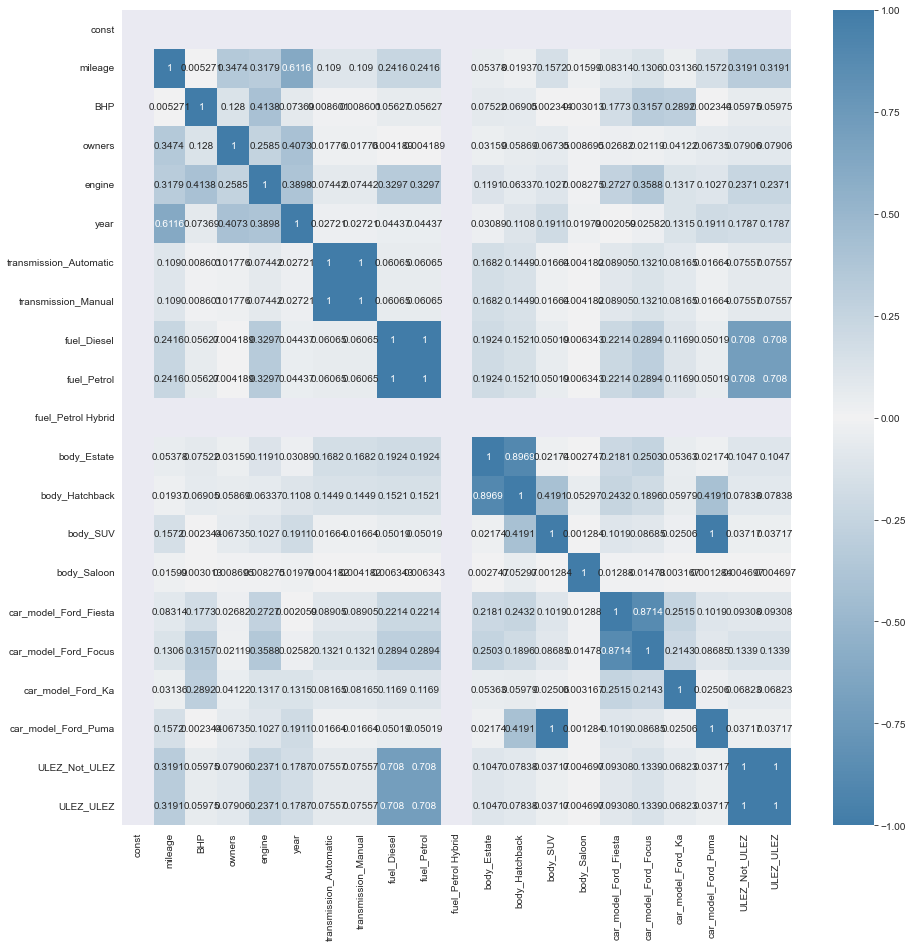

In [196]:
plt.figure(figsize = (15, 15))
sns.heatmap(X_train.corr().abs(),
            annot = True,
            linecolor='black',
            center=0,
            vmin=-1,
            vmax=1,
            cmap = sns.diverging_palette(600,600, as_cmap=True),
            fmt='.4g'
            )
plt.show()

## <u> 1st Model Best Model

In [197]:
# Using all the columns for the model

feature_cols =list(['mileage', 'BHP','owners','engine','year','fuel_Petrol','ULEZ_ULEZ','car_model_Ford_Fiesta', 'car_model_Ford_Focus', 'car_model_Ford_Ka',
                    'car_model_Ford_Puma', 'transmission_Automatic', 'body_Hatchback', 'body_Saloon'
                    ])




In [198]:
# Apply to linear regression
lin_reg = sm.OLS(y_train, X_train[feature_cols])
results = lin_reg.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     1952.
Date:                Wed, 06 Jul 2022   Prob (F-statistic):               0.00
Time:                        11:24:26   Log-Likelihood:                -56292.
No. Observations:                6165   AIC:                         1.126e+05
Df Residuals:                    6151   BIC:                         1.127e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
mileage                -1736

In [199]:
# Test our predictions against the actual results
X_train['y_pred'] = results.predict(X_train[feature_cols])

rmse = statsmodels.tools.eval_measures.rmse(y_train, X_train['y_pred'])

print(rmse)

2234.9067831520474


In [200]:
## We apply feature_eng to the X_test set!
X_test1 = feature_eng(X_test)
X_test1 = X_test1[feature_cols]
## Now we predict using the X_test set!
X_test1['y_pred'] = results.predict(X_test1)
rmse = statsmodels.tools.eval_measures.rmse(y_test, X_test1['y_pred'])
print(rmse)

2688.485966436017


# <u> Making the model for customers
Here people can insert the details about their car and the condition to get an estimate of the price.
This requires 2 inputs

In [213]:
cars.head()

,price,mileage,BHP,transmission,fuel,owners,body,ULEZ,engine,year,car_model
0,1290.0,83000.0,79.0,Manual,Petrol,5.0,Hatchback,ULEZ,1.4,2005,Ford_Fiesta
2,1380.0,92200.0,79.0,Manual,Petrol,7.0,Hatchback,ULEZ,1.4,2005,Ford_Fiesta
3,1999.0,113459.0,99.0,Manual,Petrol,4.0,Hatchback,ULEZ,1.6,2005,Ford_Fiesta
4,995.0,89960.0,74.0,Manual,Petrol,2.0,Hatchback,ULEZ,NaN,2005,Ford_Fiesta
7,1000.0,114000.0,79.0,Manual,Petrol,5.0,Hatchback,ULEZ,1.4,2005,Ford_Fiesta


In [214]:
## MAKE

car_input = {'car_model':'Ford_Focus',
             'year':'year_2018',
             'mileage':10000.0,
             'BHP':'79.0',
             'transmission':'Manual',
             'fuel':'Petrol',
             'owners':1.0,
             'ULEZ':'ULEZ',
             'body':'Hatchback',
             'engine':1.4,
             }


In [215]:
def suggest_price__Ford(car_input, Condition):

    if car_input['car_model'] == 'Ford_Fiesta':
        feature_cols = list(X_train)
        feature_cols.remove('car_model_Ford_Focus')
        feature_cols.remove('car_model_Ford_Ka')
        feature_cols.remove('car_model_Ford_Puma')
        lin_reg = sm.OLS(y_train, X_train[feature_cols])
        results = lin_reg.fit()



    elif car_input['car_model'] == 'Ford_Focus':
        feature_cols = list(X_train)
        feature_cols.remove('car_model_Ford_Fiesta')
        feature_cols.remove('car_model_Ford_Ka')
        feature_cols.remove('car_model_Ford_Puma')
        lin_reg = sm.OLS(y_train, X_train[feature_cols])
        results = lin_reg.fit()


    elif car_input['car_model'] == 'Ford_Ka':
        feature_cols = list(X_train)
        feature_cols.remove('car_model_Ford_Focus')
        feature_cols.remove('car_model_Ford_Fiesta')
        feature_cols.remove('car_model_Ford_Puma')
        lin_reg = sm.OLS(y_train, X_train[feature_cols])
        results = lin_reg.fit()



    elif car_input['car_model'] == 'Ford_Puma':
        feature_cols = list(X_train)
        feature_cols.remove('car_model_Ford_Focus')
        feature_cols.remove('car_model_Ford_Ka')
        feature_cols.remove('car_model_Ford_Fiesta')
        lin_reg = sm.OLS(y_train, X_train[feature_cols])
        results = lin_reg.fit()

    price =  ('mileage' * 'coef_mileage') + 2349032.0


    if Condition == 'No Damage':
        price = price-((price/10)*2)
    elif Condition == 'Moderate Damaged':
        price = price-((price/10)*5)
    elif Condition == 'Heavily Damaged':
        price = price-((price/10)*7)
    return price






In [216]:
suggest_price__Ford(car_input, 'No Damage')

TypeError: can't multiply sequence by non-int of type 'str'

In [ ]:
results

#return #Suggested_Price or 'snarky message about buying ALMOST any car - and yours is OUT!